In [2]:
#------------------------------------------------------------
# 
#   Set show the table top on the graph
#
#------------------------------------------------------------

%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import math

#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
# fig, tabletop = plt.subplots()
# plt.rcParams['figure.dpi'] = 150 # Set this to make the plot bigger
# tabletop.axis('equal') # Set the aspect ratio of the plot to be equal
# tabletop.set_xlim(-175, 175) # Set the limits of the plot
# tabletop.set_ylim(-110, 50) # Set the limits of the plot
# tabletop.grid(True) # Turn on the grid

#------------------------------------------------------------
# Create the table top
#------------------------------------------------------------
# Points for the table top, values are in cm
# I copied these from the project
A = (-167.64, -32.385)
B = (-167.64, -17.414)
C = (-130.203, 26.035)
D = (129.195, 26.035)
E = (167.64, -17.145)
F = (167.64, -95.885)
G = (76.20, -95.885)
H = (76.20, -32.385)

# Draw the table top
# Used (-) on the x axis to flip the table top on the x axis


def plot_table_on_chart(chart):
    plt.rcParams['figure.dpi'] = 150 # Set this to make the plot bigger
    chart.axis('equal') # Set the aspect ratio of the plot to be equal
    chart.set_xlim(-175, 175) # Set the limits of the plot
    chart.set_ylim(-110, 50) # Set the limits of the plot
    chart.grid(True) # Turn on the grid
    chart.plot(
        [A[0], B[0], C[0], D[0], E[0], F[0], G[0], H[0], A[0]],
        [A[1], B[1], C[1], D[1], E[1], F[1], G[1], H[1], A[1]],
        'k-')

In [3]:
#------------------------------------------------------------
# Understanding the log curve formula
#
# The log curve formula is: r(i) = a * exp(k * theta(i))
#
# where:
#   r(i) is the distance from the center of the log curve 
#       to the curve at angle theta(i)
#   a scales the distance of the curve from the center
#   k is the curvature of the curve, found by: cos(angle)
#       k = cos(0°) is a straight line
#       k = cos(90°) is a circle
#       So for a tighter, change the angle to a higher value
#   theta(i) is the angle from the x axis to the point on 
#       the curve
#
# P(r, theta) is a polar coordinate
# Convert to Cartesian coordinates:
# P(x, y) = (r * cos(theta), r * sin(theta))
#------------------------------------------------------------

#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
# fig, basic_log_curve_plot = plt.subplots()
# plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
# basic_log_curve_plot.axis('equal') # Set the aspect ratio of the plot to be equal
# basic_log_curve_plot.set_xlim(-4, 4) # Set the limits of the plot
# basic_log_curve_plot.set_ylim(-4, 4) # Set the limits of the plot
# basic_log_curve_plot.grid(True) # Turn on the grid

#------------------------------------------------------------
# Define the log curve parameters
#------------------------------------------------------------
a = 1.0
k = math.cos(math.radians(75))
def theta_from_index(i):
    return i * math.pi / 40 # a good number to have a smooth curve

def r(i):
    return a * math.exp(k * theta_from_index(i))

#------------------------------------------------------------
# Plot a circle for reference
#------------------------------------------------------------
# circle = plt.Circle((0, 0), 1, color='r', fill=False)
# basic_log_curve_plot.add_artist(circle)

#------------------------------------------------------------
# Plot the log curve
#------------------------------------------------------------
points = []
for i in range(0, 55):
    x = r(i) * math.cos(theta_from_index(i))
    y = r(i) * math.sin(theta_from_index(i))
    points.append([x, y])

# basic_log_curve_plot.plot([x for x, y in points], [y for x, y in points], 'b-')

In [4]:
#------------------------------------------------------------
# 
#   Altering the graph - rotate the curve
#
#  To rotate the curve, theta will need an offset added to it
#  However, you can't just directly add it like this
#  r = a * exp(k * (theta + offset))
#
#  Let's consider it's the exponent that we are changing when
#  we add an offset to theta
#  r = a * exp(k * (theta + offset))
#  This would change the value of r, which we don't want.
#
#  This can be rewritten as:
#  r = a * exp(k * theta + k * offset)
#  If we don't want to change the equation:
#  k * offset - k * offset = 0
#  So we can add: 
#  k * theta + k * offset - k * offset
#  Do some grouping:
#  k * (theta + offset) - k * offset
#  Because we are working with exponents, this is what we 
#  end up with:
#  exp(k * (theta + offset))exp(- k * offset)
#
#  So to rotate the curve, we need to do this:
#  r = a * exp(k * (theta + offset)) * exp(- k * offset)
#------------------------------------------------------------


#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
# fig, shifted_log_curve = plt.subplots()
# plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
# shifted_log_curve.axis('equal') # Set the aspect ratio of the plot to be equal
# shifted_log_curve.set_xlim(-4, 4) # Set the limits of the plot
# shifted_log_curve.set_ylim(-4, 4) # Set the limits of the plot
# shifted_log_curve.grid(True) # Turn on the grid

#------------------------------------------------------------
# Define the log curve parameters
#------------------------------------------------------------
a = 1.0
k = math.cos(math.radians(75))
def theta_from_index(i):
    return i * math.pi / 40 # a good number to have a smooth curve

def r(i):
    return a * math.exp(k * theta_from_index(i))

def shifted(i):
    return a * math.exp(k * (theta_from_index(i) + math.radians(45))) * math.exp(-k * math.radians(45))

#------------------------------------------------------------
# Plot a circle for reference
#------------------------------------------------------------
# circle = plt.Circle((0, 0), 1, color='r', fill=False)
# shifted_log_curve.add_artist(circle)

#------------------------------------------------------------
# Plot the log curve
#------------------------------------------------------------
points = []
shifted_points = []
for i in range(0, 55):
    x = r(i) * math.cos(theta_from_index(i))
    y = r(i) * math.sin(theta_from_index(i))
    points.append([x, y])
    x_ = shifted(i) * math.cos(theta_from_index(i) + math.radians(180))
    y_ = shifted(i) * math.sin(theta_from_index(i) + math.radians(180))
    shifted_points.append([x_, y_])

# shifted_log_curve.plot([x for x, y in points], [y for x, y in points], 'b-')
# shifted_log_curve.plot([x for x, y in shifted_points], [y for x, y in shifted_points], 'g-')

In [5]:
#------------------------------------------------------------
# 
#   Altering the graph - mirror the curve
#
#  To change the direction of travel around a curve, in
#  polar coordinates, you simply change the sign of theta
#  -(theta)
#  However, for our forumla:
#  r = a * exp(k * theta), if you change the sign of theta
#  you will change the value of r.
#
#  If we (again) consider the exponent:
#  k*theta, to change the direction of travel without 
#  changing the value of r, we need to do this:
#  k * theta + 0
#  0 = 2k * theta - 2k * theta
#  So we can add:
#  k * theta + 2k * theta - 2k * theta
#  Do some simplifying
#  (-2k * theta + k * theta) + (2k * theta)
#  (-k * theta) + (2k * theta)
#  Which brings us to:
#  r = a * exp(-k * theta) * exp(2k * theta)
#
#------------------------------------------------------------


#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
# fig, mirrored_log_curve = plt.subplots()
# plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
# mirrored_log_curve.axis('equal') # Set the aspect ratio of the plot to be equal
# mirrored_log_curve.set_xlim(-4, 4) # Set the limits of the plot
# mirrored_log_curve.set_ylim(-4, 4) # Set the limits of the plot
# mirrored_log_curve.grid(True) # Turn on the grid

#------------------------------------------------------------
# Define the log curve parameters
#------------------------------------------------------------
a = 1.0
k = math.cos(math.radians(75))
def theta_from_index(i):
    return i * math.pi / 40 # a good number to have a smooth curve

def r(i):
    return a * math.exp(k * theta_from_index(i))

def mirrored(i):
    return a * math.exp(-k * theta_from_index(i)) * math.exp(2 * k * theta_from_index(i))

#------------------------------------------------------------
# Plot a circle for reference
#------------------------------------------------------------
# circle = plt.Circle((0, 0), 1, color='r', fill=False)
# mirrored_log_curve.add_artist(circle)

#------------------------------------------------------------
# Plot the log curve
#------------------------------------------------------------
points = []
mirrored_points = []
for i in range(0, 55):
    x = r(i) * math.cos(theta_from_index(i))
    y = r(i) * math.sin(theta_from_index(i))
    points.append([x, y])
    x_ = mirrored(i) * math.cos(-theta_from_index(i))
    y_ = mirrored(i) * math.sin(-theta_from_index(i))
    mirrored_points.append([x_, y_])

# mirrored_log_curve.plot([x for x, y in points], [y for x, y in points], 'b-')
# mirrored_log_curve.plot([x for x, y in mirrored_points], [y for x, y in mirrored_points], 'g-')

In [6]:
#------------------------------------------------------------
# 
#   Altering the graph - mirrored and rotated curve
#
#  To mirror and rotate the curve, we need to combine the
#  two transformations:
#  r = a * exp(k * (theta + offset)) * exp(- k * offset)
#  r = a * exp(-k * theta) * exp(2k * theta)
#  Which gives us
#  r = a * exp(-k * (theta + offset)) * exp(-k * (offset)) * exp(2k * (theta+offset))
#
#------------------------------------------------------------


#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
# fig, mirrored_and_rotated_plot = plt.subplots()
# plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
# mirrored_and_rotated_plot.axis('equal') # Set the aspect ratio of the plot to be equal
# mirrored_and_rotated_plot.set_xlim(-4, 4) # Set the limits of the plot
# mirrored_and_rotated_plot.set_ylim(-4, 4) # Set the limits of the plot
# mirrored_and_rotated_plot.grid(True) # Turn on the grid

#------------------------------------------------------------
# Define the log curve parameters
#------------------------------------------------------------
a = 1.0
k = math.cos(math.radians(75))
def theta_from_index(i):
    return i * math.pi / 40 # a good number to have a smooth curve

def r(i):
    return a * math.exp(k * theta_from_index(i))

def mirrored_and_rotated(i):
    adjusted_theta = math.pi + theta_from_index(i)
    return a * math.exp(-k * adjusted_theta) * math.exp(-k * math.pi) * math.exp(2 * k * adjusted_theta)

#------------------------------------------------------------
# Plot a circle for reference
#------------------------------------------------------------
# circle = plt.Circle((0, 0), 1, color='r', fill=False)
# mirrored_and_rotated_plot.add_artist(circle)

#------------------------------------------------------------
# Plot the log curve
#------------------------------------------------------------
points = []
mirrored_and_rotated_points = []
for i in range(0, 55):
    x = r(i) * math.cos(theta_from_index(i))
    y = r(i) * math.sin(theta_from_index(i))
    points.append([x, y])
    x_ = mirrored_and_rotated(i) * math.cos(-theta_from_index(i) + math.pi)
    y_ = mirrored_and_rotated(i) * math.sin(-theta_from_index(i) + math.pi)
    mirrored_and_rotated_points.append([x_, y_])

# mirrored_and_rotated_plot.plot([x for x, y in points], [y for x, y in points], 'b-')
# mirrored_and_rotated_plot.plot([x for x, y in mirrored_and_rotated_points], [y for x, y in mirrored_and_rotated_points], 'g-')

In [7]:
#------------------------------------------------------------
# 
#   Log Curve Constants - Scaling r
#
#  The curve shape come from the exponential term:
# exp(k*theta)
#
#  The r value can be scaled using the term 'a' in the
# function
#
#  Just for getting started, I think a constant value should
# suffice, but I'll make this a function that accepts an 
# iteration argument in case I want to have a dynamic value
#
#------------------------------------------------------------

# fig, scale_plot = plt.subplots()
# plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
# scale_plot.axis('equal') # Set the aspect ratio of the plot to be equal
# scale_plot.grid(True) # Turn on the grid
# scale_plot.set_xlim(-10, 10) # Set the limits of the plot
# scale_plot.set_ylim(-10, 10) # Set the limits of the plot

def scale_factor(scale = 1):
    return scale

scale1 = []
scale3 = []
k = math.cos(math.radians(75))
for i in range(0, 40):
    theta = i * math.pi / 40
    distance = 1 * math.exp(k * theta)
    x = distance * math.cos(theta)
    y = distance * math.sin(theta)
    scale1.append([x, y])
    distance = 3 * math.exp(k * theta)
    x = distance * math.cos(theta)
    y = distance * math.sin(theta)
    scale3.append([x, y])

# scale_plot.plot([x for x, y in scale1], [y for x, y in scale1], 'b-')
# scale_plot.plot([x for x, y in scale3], [y for x, y in scale3], 'g-')

# circle = plt.Circle((0,0), 1, color='k', fill=False)
# scale_plot.add_artist(circle)

In [8]:
#------------------------------------------------------------
# 
#   Pitch angle drives how tight the curve is.
#
# k is the curvature of the curve, found by: cos(angle)
#
# k = cos(0°) is a straight line
# k = cos(90°) is a circle
# So for a tighter curve, change the angle to a higher value
#
#------------------------------------------------------------

# fig, pitch_angle_plot = plt.subplots()
# plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
# pitch_angle_plot.axis('equal') # Set the aspect ratio of the plot to be equal
# pitch_angle_plot.grid(True) # Turn on the grid
# pitch_angle_plot.set_xlim(-10, 10) # Set the limits of the plot
# pitch_angle_plot.set_ylim(-10, 10) # Set the limits of the plot

# Returns the pitch angle of the log curve
def pitch_angle(angle=40):
    return 1/math.tan(math.radians(angle))

pa_40 = []
pa_70 = []
for i in range(0, 40):
    theta = i * math.pi / 40
    distance = math.exp(pitch_angle(40) * theta)
    x = distance * math.cos(theta)
    y = distance * math.sin(theta)
    pa_40.append([x, y])
    distance = math.exp(pitch_angle(70) * theta)
    x = distance * math.cos(theta)
    y = distance * math.sin(theta)
    pa_70.append([x, y])

# pitch_angle_plot.plot([x for x, y in pa_40], [y for x, y in pa_40], 'b-')
# pitch_angle_plot.plot([x for x, y in pa_70], [y for x, y in pa_70], 'g-')

# circle = plt.Circle((0,0), 1, color='k', fill=False)
# pitch_angle_plot.add_artist(circle)

In [9]:
#------------------------------------------------------------
# 
#   Calculating theta from an index
#
#  The resolution controls how fine the curve is
#  Index is used as a multiplier to move around the curve
#
#  A good number to have a smooth curve
#------------------------------------------------------------
def theta_from_index(i = 0, resolution = 40):
    return i * math.pi / resolution # 

In [10]:
#------------------------------------------------------------
# 
#   Define r and r' functions
#
#  r(i) = a * exp(k * (theta(i) + rotation)) exp(- k * rotation)
#  r'(i) = a 
#          * exp(-k * (theta + offset + rotation)) 
#          * exp(-k * (offset + rotation)) 
#          * exp(2k * (theta + offset + rotation))))
#
#------------------------------------------------------------

# resolution = 100
round_by = 4

def calculate_r(args):
    a, k, theta, rotation = args
    return a * math.exp(k * (theta + rotation)) * math.exp(-k * rotation)

def calculate_r_cartesian(args):
    r, theta, rotation = args
    x = np.round(r * math.cos(theta + rotation), round_by)
    y = np.round(r * math.sin(theta + rotation), round_by)
    return {"x": x, "y": y}

def calculate_r_prime(args):
    a, k, theta, rotation = args
    return a * math.exp(-k * (math.pi + rotation + theta)) * math.exp(-k * (math.pi + rotation)) * math.exp(2 * k * (math.pi + rotation + theta))

def calculate_r_prime_cartesian(args):
    r, theta, rotation = args
    x = np.round(r * math.cos(-(theta + math.pi + rotation)), round_by)
    y = np.round(r * math.sin(-(theta + math.pi + rotation)), round_by)
    return {"x": x, "y": y}

# def r(i, rotation=0):
def r(args):
    a, k, i, resolution, rotation = args
    theta = theta_from_index(i, resolution)
    r = calculate_r((a, k, theta, rotation))
    cart_points = calculate_r_cartesian((r, theta, rotation))
    point = {
        "r": r,
        "theta": theta,
        "rotation": rotation,
        "x": cart_points["x"],
        "y": cart_points["y"]
    }
    return point

def r_prime(args):
    a, k, i, resolution, rotation = args
    theta = theta_from_index(i, resolution)
    r = calculate_r_prime((a, k, theta, rotation))
    cart_points = calculate_r_prime_cartesian((r, theta, rotation))
    point = {
        "r": r,
        "theta": theta,
        "rotation": rotation,
        "x": cart_points['x'],
        "y": cart_points['y']
    }
    return point

In [11]:
#------------------------------------------------------------
# 
#   Generate a set of curves
#
#   Inputs:
#     - qty: The number of curves to generate
#
#   Outputs:
#     - Curves, an array of curves, where the data point
#       is an array of points as returned by the r and r'
#------------------------------------------------------------
# fig, curve_generator = plt.subplots()
# # plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
# curve_generator.axis('equal') # Set the aspect ratio of the plot to be equal
# curve_generator.grid(True) # Turn on the grid
# # curve_generator.set_xlim(-10, 10) # Set the limits of the plot
# # curve_generator.set_ylim(-10, 10) # Set the limits of the plot

def generate_curve(args):
    a, k, resolution, rotation, length = args
    curve = []
    mirror_curve = []
    for i in range(0, length):
        curve_args = (a, k, i, resolution, rotation)
        curve.append(r(curve_args))
        mirror_curve.append(r_prime(curve_args))
    return {
        "curve": curve,
        "mirror_curve": mirror_curve
    }

# def generate_curves(number_of_curves=1, number_of_points=40):
def generate_curves(args):
    a, k,  number_of_curves, resolution, length = args
    curves = []
    mirrored_curves = []
    for i in range(0, number_of_curves):
        rotation = math.radians(i * 360 / number_of_curves)
        curve_args = (a, k, resolution, rotation, length)
        new_curves = generate_curve(curve_args)
        curves.append(new_curves["curve"])
        mirrored_curves.append(new_curves["mirror_curve"])
    return {
        "curves": curves,
        "mirrored_curves": mirrored_curves
    }

def plot_curves(curves, chart):
    for curve in curves["curves"]:
        chart.plot([point["x"] for point in curve], [point["y"] for point in curve], 'b-')
    for mirrored_curve in curves["mirrored_curves"]:
        chart.plot([point["x"] for point in mirrored_curve], [point["y"] for point in mirrored_curve], 'g-')

curve_set = generate_curves((scale_factor(10), pitch_angle(), 11, 100, 75))
print(len(curve_set["curves"]))
print(len(curve_set["mirrored_curves"]))
# plot_curves(curve_set, curve_generator)

11
11


Curve 0 has theta: 0.0 and rotation: 0.0
Max r(189.60000000000002): 51.60840580357623
curve: 0.0 mirror: 180.0
curve: 0.0 mirror: 252.0
curve: 0.0 mirror: 324.0
curve: 0.0 mirror: 396.0
curve: 0.0 mirror: 468.0
Curve 1 has theta: 0.0 and rotation: 72.0
Max r(261.6): 51.60840580357622
curve: 72.0 mirror: 180.0
curve: 72.0 mirror: 252.0
curve: 72.0 mirror: 324.0
curve: 72.0 mirror: 396.0
curve: 72.0 mirror: 468.0
Curve 2 has theta: 0.0 and rotation: 144.0
Max r(333.6): 51.608405803576204
curve: 144.0 mirror: 180.0
curve: 144.0 mirror: 252.0
curve: 144.0 mirror: 324.0
curve: 144.0 mirror: 396.0
curve: 144.0 mirror: 468.0
Curve 3 has theta: 0.0 and rotation: 216.0
Max r(405.6): 51.60840580357619
curve: 216.0 mirror: 180.0
curve: 216.0 mirror: 252.0
curve: 216.0 mirror: 324.0
curve: 216.0 mirror: 396.0
curve: 216.0 mirror: 468.0
Curve 4 has theta: 0.0 and rotation: 288.0
Max r(477.6): 51.60840580357618
curve: 288.0 mirror: 180.0
curve: 288.0 mirror: 252.0
curve: 288.0 mirror: 324.0
curve: 2

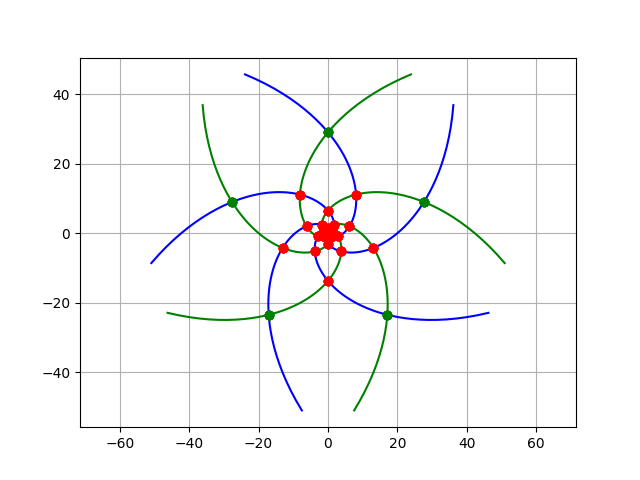

In [12]:
#------------------------------------------------------------
# 
#   Find the set of points shared by 2 or more lines
#
#   Try using NumPy's library to find roots
#
#------------------------------------------------------------
fig, matching_points_coef = plt.subplots()
# plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
matching_points_coef.axis('equal') # Set the aspect ratio of the plot to be equal
matching_points_coef.grid(True) # Turn on the grid
# matching_points.set_xlim(-8, 8) # Set the limits of the plot
# matching_points.set_ylim(-8, 8) # Set the limits of the plot

number_of_curves = 5
a = scale_factor(1)
k = pitch_angle(40)
resolution = 75
length = 80

curve_set = generate_curves((a, k, number_of_curves, resolution, length))
plot_curves(curve_set, matching_points_coef)


# Someone said that the curve cross at r = ab^theta and r = ab^(phi - theta + 2n*pi)
for curve_index, curve in enumerate(curve_set['curves']):
#     for i, rotation in enumerate(list_of_curves):
#         if rotation < math.pi/2:
#             rotation = rotation + math.pi
#         t_0 = rotation / 2
#         print(math.degrees(t_0))
#         r_0 = calculate_r((a, k, t_0, curve[0]['rotation']))
#         b_0 = calculate_r_cartesian((r_0, t_0, curve[0]['rotation']))
#         matching_points_coef.plot(b_0['x'], b_0['y'], 'ro') 

#     I have figured out that the bisecting angle is the mirror rotation / 2, but if mirror rotation is greater than ???, then it is mirror rotation - 360
# I'm not sure if there are some multiples I should be worried about - what if rotation is like, 30000 degrees?
    # rotation = i * 360 / n_curves
    print(f"Curve {curve_index} has theta: {math.degrees(curve[0]['theta'])} and rotation: {math.degrees(curve[0]['rotation'])}")
    print(f"Max r({math.degrees(curve[-1]['rotation'] + curve[-1]['theta'])}): {curve[-1]['r']}")
    for mirror_index, mirror in enumerate(curve_set["mirrored_curves"]):
        curve_rotate = curve[0]['rotation']
        mirror_rotate = mirror[0]['rotation'] + math.pi
        manual = (180)/2
        r_0_2 = calculate_r((a, k, math.radians(manual), curve_rotate))
        b_0_2 = calculate_r_cartesian((r_0_2, math.radians(manual), curve_rotate))
        matching_points_coef.plot(b_0_2['x'], b_0_2['y'], 'ro')
        manual = (252)/2
        r_0_2 = calculate_r((a, k, math.radians(manual), curve_rotate))
        b_0_2 = calculate_r_cartesian((r_0_2, math.radians(manual), curve_rotate))
        matching_points_coef.plot(b_0_2['x'], b_0_2['y'], 'ro')
        manual = (324)/2
        r_0_2 = calculate_r((a, k, math.radians(manual), curve_rotate))
        b_0_2 = calculate_r_cartesian((r_0_2, math.radians(manual), curve_rotate))
        matching_points_coef.plot(b_0_2['x'], b_0_2['y'], 'go')
        manual = (396 - 360)/2
        r_0_2 = calculate_r((a, k, math.radians(manual), curve_rotate))
        b_0_2 = calculate_r_cartesian((r_0_2, math.radians(manual), curve_rotate))
        matching_points_coef.plot(b_0_2['x'], b_0_2['y'], 'ro')
        manual = (468 - 360)/2
        r_0_2 = calculate_r((a, k, math.radians(manual), curve_rotate))
        b_0_2 = calculate_r_cartesian((r_0_2, math.radians(manual), curve_rotate))
        matching_points_coef.plot(b_0_2['x'], b_0_2['y'], 'ro')
        print(f"curve: {math.degrees(curve_rotate)} mirror: {math.degrees(mirror_rotate)}")

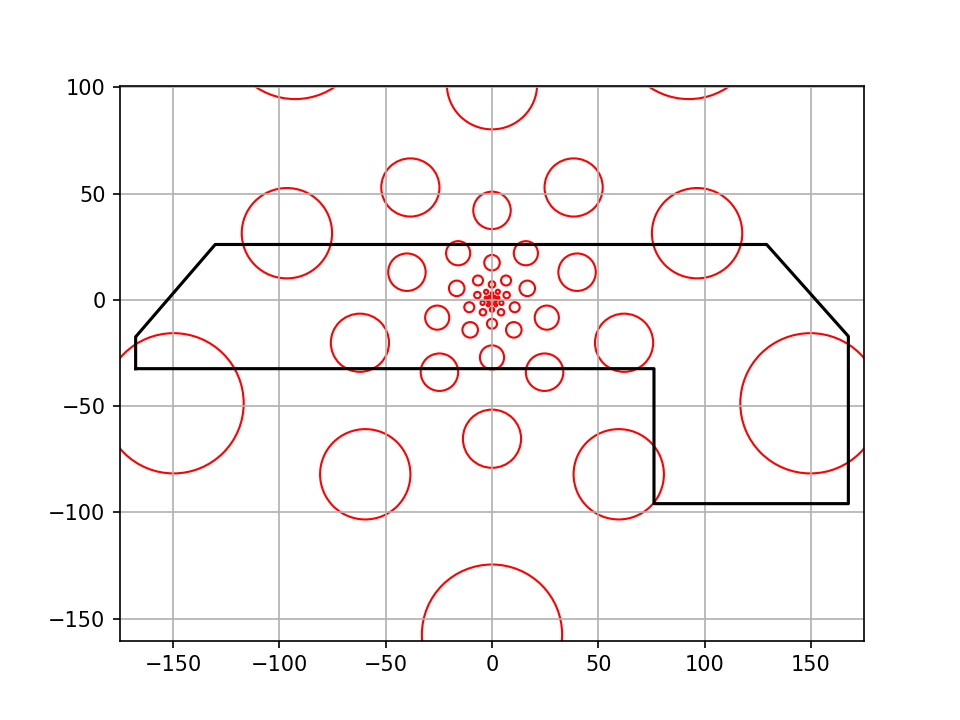

In [43]:
#------------------------------------------------------------
# 
#   Find the set of points shared by 2 or more lines
#
#   Try using NumPy's library to find roots
#
#------------------------------------------------------------
fig, matching_points_finally = plt.subplots()
# plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
matching_points_finally.axis('equal') # Set the aspect ratio of the plot to be equal
matching_points_finally.grid(True) # Turn on the grid
# matching_points.set_xlim(-8, 8) # Set the limits of the plot
# matching_points.set_ylim(-8, 8) # Set the limits of the plot

number_of_curves = 5
a = scale_factor(1)
k = pitch_angle(55)
resolution = 100
length = 250

curve_set = generate_curves((a, k, number_of_curves, resolution, length))
plot_table_on_chart(matching_points_finally)
# plot_curves(curve_set, matching_points_finally)

max_theta = curve_set["curves"][0][-1]['theta']

def get_intersection_angle(angle):
    corrected_angle = angle
    if corrected_angle >= 2*math.pi:
        corrected_angle = corrected_angle - (math.pi * math.floor(corrected_angle / math.pi))
    return corrected_angle / 2

def generate_intersection_angles(max_theta):
    angle_list = []
    mirror_rotations = [curve[0]['rotation'] for curve in curve_set["mirrored_curves"]]
    angle_list = [get_intersection_angle(rotation + math.pi) for rotation in mirror_rotations]
    remaining_curve = max_theta - min(angle_list)
    starting_list = list(angle_list)
    for i in range(1, math.floor(remaining_curve / math.pi) + 1):
        incremented = [angle + (math.pi * i) for angle in starting_list]
        angle_list.extend(incremented)
    angle_list = np.array(angle_list)
    angle_list = angle_list[angle_list <= max_theta] # Filter out angles that are greater than the max theta
    angle_list = angle_list[angle_list >= 0] # Filter out angles that are less than 0
    return angle_list

angle_list = generate_intersection_angles(max_theta)

def get_circle_radius(r, list_of_r):
    scaling = 3
    return (math.pi * r) / (scaling * number_of_curves)

def generate_intersections(curve_set, angle_list):
    list_of_r = []
    for curve_index, curve in enumerate(curve_set["curves"]):
        for angle_index, angle in enumerate(angle_list):
            r_intersect = calculate_r((a, k, angle, curve[0]['rotation']))
            x_int, y_int = calculate_r_cartesian((r_intersect, angle, curve[0]['rotation'])).values()
            list_of_r.append({"r": round(r_intersect, 6), "x": x_int, "y": y_int})
    return np.array(list_of_r)

list_of_r = generate_intersections(curve_set, angle_list)

def plot_circles(list_of_r):
    # Get a list of the unique r values
    only_r = []
    for r in list_of_r:
        only_r.append(r["r"])
    only_r = np.array(only_r)    
    only_r = np.sort(np.unique(only_r))
    for r in list_of_r:
        circle = plt.Circle((r["x"], r["y"]), get_circle_radius(r["r"], only_r), color='r', fill=False)
        matching_points_finally.add_artist(circle)

plot_circles(list_of_r)